In [1]:
import glob
import numpy
import pandas
import seaborn
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from IPython.display import display, HTML, Math, Markdown
display(HTML("<style>.container { width:95% !important; }</style>"))

%load_ext autoreload
%autoreload 2

In [3]:
import pickle
with open('./iJL1678b-ME/MEModel-step2-iJL1678b-ME.pkl', 'rb') as infile:
    me = pickle.load(infile)

me.add_boundary(me.metabolites.li_c, type = 'sink')
me.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2024-04-01
Read LP format model from file /tmp/tmp_t9s7jc9.lp
Reading time = 0.00 seconds
: 0 rows, 0 columns, 0 nonzeros
Read LP format model from file /tmp/tmpaywvve42.lp
Reading time = 0.01 seconds
: 1660 rows, 4754 columns, 17902 nonzeros
Read LP format model from file /tmp/tmpoq21h238.lp
Reading time = 0.01 seconds
: 1810 rows, 5220 columns, 17878 nonzeros
Iteration	 Solution to check	Solver Status
---------	------------------	-------------
        1	0.5000000000000000	Optimal
        2	0.7500000000000000	Optimal
        3	0.8750000000000000	Not feasible
        4	0.8125000000000000	Not feasible
        5	0.7812500000000000	Optimal
        6	0.7968750000000000	Not feasible
        7	0.7890625000000000	Optimal
        8	0.7929687500000000	Optimal
        9	0.7949218750000000	Not feasible
       10	0.7939453125000000	Not feasible
       11	0.7934570312500000	Optimal
       12	0.7937011718750000	Not feasi

True

In [4]:
# 15min, 15 CPUs
def get_feas(mu):
    me.feasibility({me.mu : mu}, tolerance = 1e-15)
    return me.solution

opt = me.solution.objective_value
mus = numpy.arange(0.01, opt, 0.01)

import multiprocessing
with multiprocessing.Pool(multiprocessing.cpu_count()-1) as pool:
    fluxes = pool.map(get_feas, mus)

In [5]:
types = set()
for rxn in me.reactions:
    types.add(type(rxn))
list(types)[0]

coralme.core.reaction.MEReaction

In [6]:
import coralme, sympy

directly_modeled = {}

def get_reactions(met, rxn_type):
    value = sympy.Float(0)
    reactions = []
    
    for rxn in met.reactions:
        if isinstance(rxn, (rxn_type)) and rxn.metabolites[met] < 0:
            reactions.append(rxn.id)
            value += rxn.metabolites[met] * fluxes[idx][rxn.id]
    
    return value, reactions

for rxn_type in types:
    directly_modeled[rxn_type] = {}
    for met in ['atp_c', 'utp_c', 'gtp_c', 'ctp_c', 'datp_c', 'dttp_c', 'dgtp_c', 'dctp_c', ]:
        directly_modeled[rxn_type][met] = []
        for idx, mu in enumerate(mus):
            value, reactions = get_reactions(me.metabolites.get_by_id(met), rxn_type)
            directly_modeled[rxn_type][met].append(value.subs({me.mu : me.solution.objective_value}))

In [7]:
df_directly_modeled = pandas.DataFrame.from_dict(directly_modeled)
df_directly_modeled

,<class 'coralme.core.reaction.MEReaction'>,<class 'coralme.core.reaction.TranslationReaction'>,<class 'coralme.core.reaction.GenericFormationReaction'>,<class 'coralme.core.reaction.TranscriptionReaction'>,<class 'coralme.core.reaction.MetabolicReaction'>,<class 'coralme.core.reaction.PostTranslationReaction'>,<class 'coralme.core.reaction.SummaryVariable'>,<class 'coralme.core.reaction.ComplexFormation'>,<class 'coralme.core.reaction.tRNAChargingReaction'>
atp_c,"[-2.05236438860880, -2.88474188300621, -3.7162...","[-0.0626885692494381, -0.125136671820950, -0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0120709516585509, -0.0130614588336322, -0....","[-0.627702593009054, -1.04673416641762, -1.465...","[-9.42867101628377e-5, -0.000193643287376630, ...","[-1.34980000000000, -1.69960000000000, -2.0494...","[-7.84290488288856e-11, -3.13716330411604e-10,...","[-7.98790316326339e-6, -1.59423329184913e-5, -..."
utp_c,"[-0.0156139736126692, -0.0193747832808756, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0123927075070588, -0.0134202706972654, -0....","[-0.00322126610561045, -0.00595451258361027, -...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
gtp_c,"[-0.143188558065882, -0.274295368770255, -0.40...","[-0.125016988299855, -0.249559939414288, -0.37...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0120650400897219, -0.0130158819337113, -0....","[-0.00606795405359563, -0.0116417848849170, -0...","[-3.65655632322998e-5, -7.36971512933073e-5, -...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1.07942555553537e-6, -2.20842592752339e-6, -...","[-9.30633921384334e-7, -1.85696011787654e-6, -..."
ctp_c,"[-0.0160403860797359, -0.0195542560749768, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0137066218727079, -0.0148867085292398, -0....","[-0.00233376420702792, -0.00466754754573691, -...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
datp_c,"[-0.000474579008927195, -0.000949156872019905,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-4.65167969358941e-56, -6.40605739185398e-23,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.000474579008927195, -0.000949156872019905,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
dttp_c,"[-0.000474579008927195, -0.000949156872019905,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-3.63263897807889e-50, -2.93781375554723e-20,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.000474579008927195, -0.000949156872019905,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
dgtp_c,"[-0.000488492096290678, -0.000976983013154792,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.16291992339735e-56, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.000488492096290678, -0.000976983013154792,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
dctp_c,"[-0.000488492096290678, -0.000976983013154792,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","

In [15]:
from scipy.stats import linregress
# print('atp', slope, intercept, r_value**2, p_value, std_err)
slopes = df_directly_modeled.applymap(lambda x: linregress(mus, [ -1. * float(x) for x in x])[0])
slopes = slopes.loc[:, ~slopes.columns.isin(
    [coralme.core.reaction.MEReaction, 
     coralme.core.reaction.MetabolicReaction,
    coralme.core.reaction.GenericFormationReaction])]
slopes.columns = ['Translation', 'Transcription', 'PostTranslation', 'Summary Variables', 'Complex Formation', 'tRNA Charging', ]
slopes

,Translation,Transcription,PostTranslation,Summary Variables,Complex Formation,tRNA Charging
atp_c,5.663769,0.214607,0.030283,34.980000,6.274515e-07,0.000698
utp_c,0.000000,0.224638,0.000000,0.000000,0.000000e+00,0.000000
gtp_c,11.289428,0.204677,0.006230,0.000000,2.912385e-04,0.000089
ctp_c,0.000000,0.260285,0.000000,0.000000,0.000000e+00,0.000000
datp_c,0.000000,0.000000,0.000000,0.023095,0.000000e+00,0.000000
dttp_c,0.000000,0.000000,0.000000,0.023095,0.000000e+00,0.000000
dgtp_c,0.000000,0.000000,0.000000,0.023772,0.000000e+00,0.000000
dctp_c,0.000000,0.000000,0.000000,0.023772,0.000000e+00,0.000000


<AxesSubplot:>

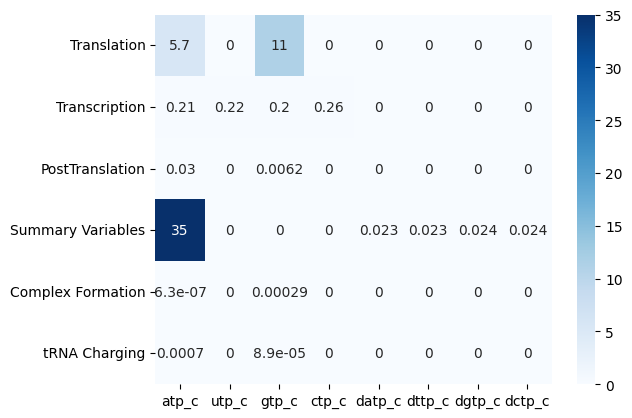

In [16]:
seaborn.heatmap(slopes.T, annot = True, cmap = 'Blues', vmax = 35.)

In [24]:
slopes.T[['atp_c', 'gtp_c']].sum().sum() - slopes.T['gtp_c']['Transcription'] - slopes.T['atp_c']['Summary Variables']

17.205396669949394

In [11]:
import cobra
model = cobra.io.load_json_model('inputs/iAF1260.json')
mets = ['atp_c', 'utp_c', 'gtp_c', 'ctp_c', 'datp_c', 'dttp_c', 'dgtp_c', 'dctp_c', 'ppi_c', 'pi_c', 'adp_c', 'h2o_c']
dct = { k.id:v for k,v in model.reactions.query('BIOM')[0].metabolites.items() if k.id in mets }
dct = { k:dct[k] for k in mets}
dct

{'atp_c': -59.984,
 'utp_c': -0.1441,
 'gtp_c': -0.2151,
 'ctp_c': -0.1335,
 'datp_c': -0.02617,
 'dttp_c': -0.02617,
 'dgtp_c': -0.02702,
 'dctp_c': -0.02702,
 'ppi_c': 0.7739,
 'pi_c': 59.806,
 'adp_c': 59.81,
 'h2o_c': -54.462}

In [12]:
abs(59.81-59.984)+0.1441+0.2151+0.1335+0.02617+0.02617+0.02702+0.02702

0.7730799999999995